# Homr

## Optical Music Recognition (OMR). Transforms music sheet photo into MusicXML.

Original Author: [Christian Liebhardt](https://github.com/liebharc)

Provided By: [BreezeWhite](https://github.com/BreezeWhite)

Original Github: https://github.com/liebharc/homr

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/BreezeWhite/interesting-colabs/blob/main/scripts/Homr.ipynb)

In [ ]:
#@title Setup

!add-apt-repository --yes ppa:mscore-ubuntu/mscore3-stable
!apt-get update
!apt-get --yes install musescore3
!pip install git+https://github.com/liebharc/homr

%load_ext autoreload
%autoreload 2

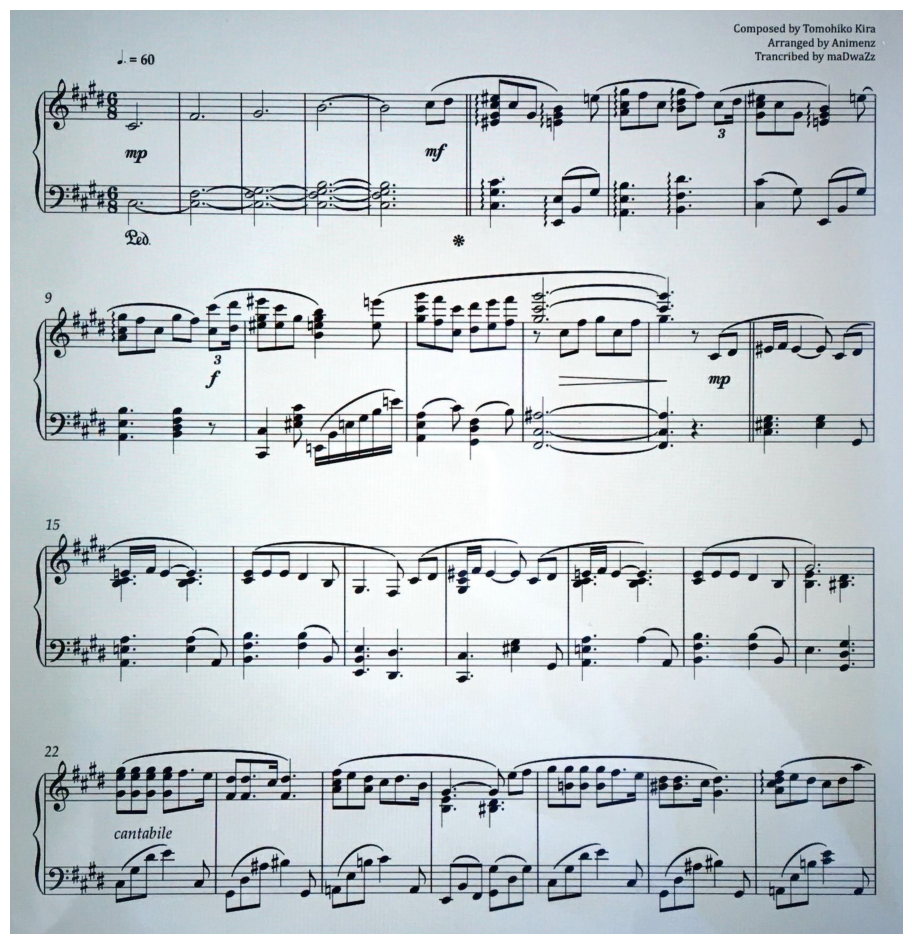

In [26]:
#@title Upload Image

%matplotlib inline

from google.colab import files
import matplotlib.pyplot as plt
import cv2
import os

ff = files.upload()
img_path = list(ff.keys())[0]
basename = img_path.replace(".jpg", "").replace(".png", "")

os.environ['img_path'] = img_path
os.environ['basename'] = basename

plt.rcParams['figure.figsize'] = (12, 12)
plt.axis('off')
img = cv2.imread(img_path)
plt.imshow(img)
plt.show()

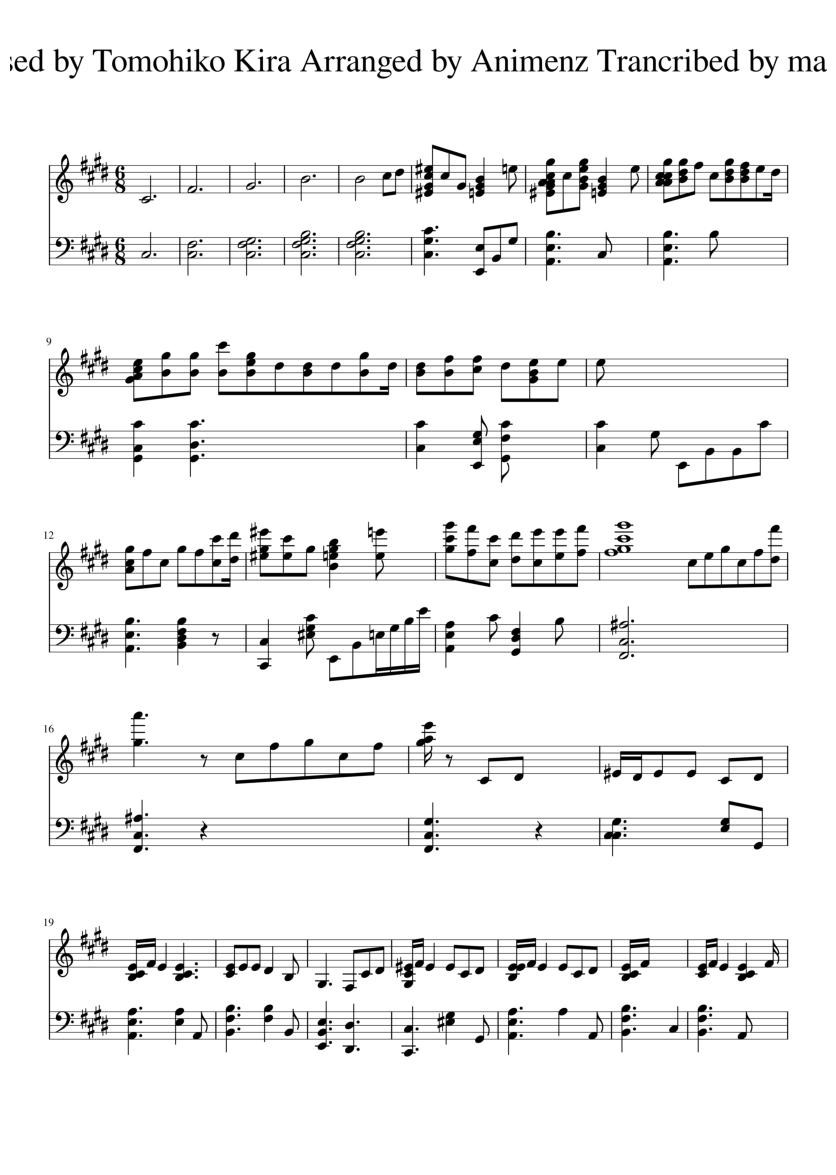

In [25]:
#@title Run

import IPython.display as dsp
import matplotlib.pyplot as plt

%env DEBIAN_FRONTEND=noninteractive
%env QT_QPA_PLATFORM=offscreen

!homr "$img_path"

!musescore3 -o "${basename}.mp3" $basename.musicxml
!musescore3 -o "${basename}.png" $basename.musicxml


img = plt.imread(f"{basename}-1.png")
plt.rcParams['figure.figsize'] = (15, 15)
plt.axis('off')
plt.imshow(img)
plt.show()

dsp.display(dsp.Audio(f"{basename}.mp3"))